In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 
from scipy.optimize import curve_fit
#### PLOT THE DATA #######
SMALL_SIZE = 13.5
MEDIUM_SIZE = 17
BIGGER_SIZE = 23
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [18]:
from ion_properties import lead,calcium,xenon,xenon2nd


Transverse cooling for all ions

In [19]:
# transverse_growth_rate_list=[]
# longitundinal_growth_rate=[]
# ion_names=[ion.name for ion in ions]
# ion_energy=[ion.hw0 for ion in ions]

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})

# for ion_loop in ions:
#     loaded_data = np.load(f'results/transverse/{ion_loop.name}.npz')

#     delta = loaded_data['delta']
#     zeta = loaded_data['zeta']
#     state = loaded_data['state']
#     x = loaded_data['x']
#     time=loaded_data['time']
#     s_per_turn=loaded_data['s_per_turn']
#     px=loaded_data['px']
#     action_x=loaded_data['action_x']
#     action_y=loaded_data['action_y']
#     emittance_x=loaded_data['emittance_x']
#     rms_dp_p = np.std(delta, axis=1)

#     index_closest = np.abs(emittance_x - 0.85*emittance_x[0]).argmin()

#     print(index_closest)

#     # Define the exponential function
#     def exponential_func(x, a, b):
#         return a * np.exp(x * b)
 
#     # Fit the data to the exponential function
#     params_transverse, covariance = curve_fit(exponential_func, time[:index_closest], emittance_x[:index_closest])

#     # Extract the parameters
#     a, b = params_transverse

#     transverse_growth_rate_list.append(b)

#     plt.plot(time,emittance_x*1e6, label=f'{ion_loop.name}', linewidth=5.0)

#     plt.plot(time[:index_closest], exponential_func(time[:index_closest], *params_transverse) * 1e6, linestyle='--', label=f'{ion_loop.name} Fit')
    
# plt.xlabel(r'Time [s]')
# plt.ylabel(r'Normalised emittance $\epsilon_x$ [mm mrad]')
# plt.legend()
# plt.tight_layout()
# plt.savefig('Transverse_laser_cooling_rates.png', dpi=300)
# plt.show()

fit dp/p

In [20]:

# longitundinal_growth_rate=[]
# ion_names=[ion.name for ion in ions]
# ion_energy=[ion.hw0 for ion in ions]

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})

# for ion_loop in ions:
#     loaded_data = np.load(f'results/transverse/{ion_loop.name}.npz')

#     delta = loaded_data['delta']
#     zeta = loaded_data['zeta']
#     state = loaded_data['state']
#     x = loaded_data['x']
#     time=loaded_data['time']
#     s_per_turn=loaded_data['s_per_turn']
#     px=loaded_data['px']
#     action_x=loaded_data['action_x']
#     action_y=loaded_data['action_y']
#     emittance_x=loaded_data['emittance_x']
#     rms_dp_p = np.std(delta, axis=1)

#     index_closest = np.abs(rms_dp_p - 0.85*rms_dp_p[0]).argmin()

#      # Define the exponential function
#     def exponential_func(x, a, b):
#         return rms_dp_p[0] * np.exp(x * b)

#     # Fit the data to the exponential function
#     params_transverse, covariance = curve_fit(exponential_func, time[:index_closest], rms_dp_p[:index_closest])

#     # Extract the parameters
#     a, b = params_transverse

#     longitundinal_growth_rate.append(b)

#     plt.plot(time,rms_dp_p*1e6, label=f'{ion_loop.name}', linewidth=5.0)

#     plt.plot(time[:index_closest], exponential_func(time[:index_closest], *params_transverse) * 1e6, linestyle='--', label=f'{ion_loop.name} Fit')

    
# plt.xlabel(r'Time [s]')
# plt.ylabel(r'Normalised emittance $\epsilon_x$ [mm mrad]')
# plt.legend()
# plt.tight_layout()
# plt.savefig('Transverse_laser_cooling_rates.png', dpi=300)
# plt.show()

Also plot dp/p

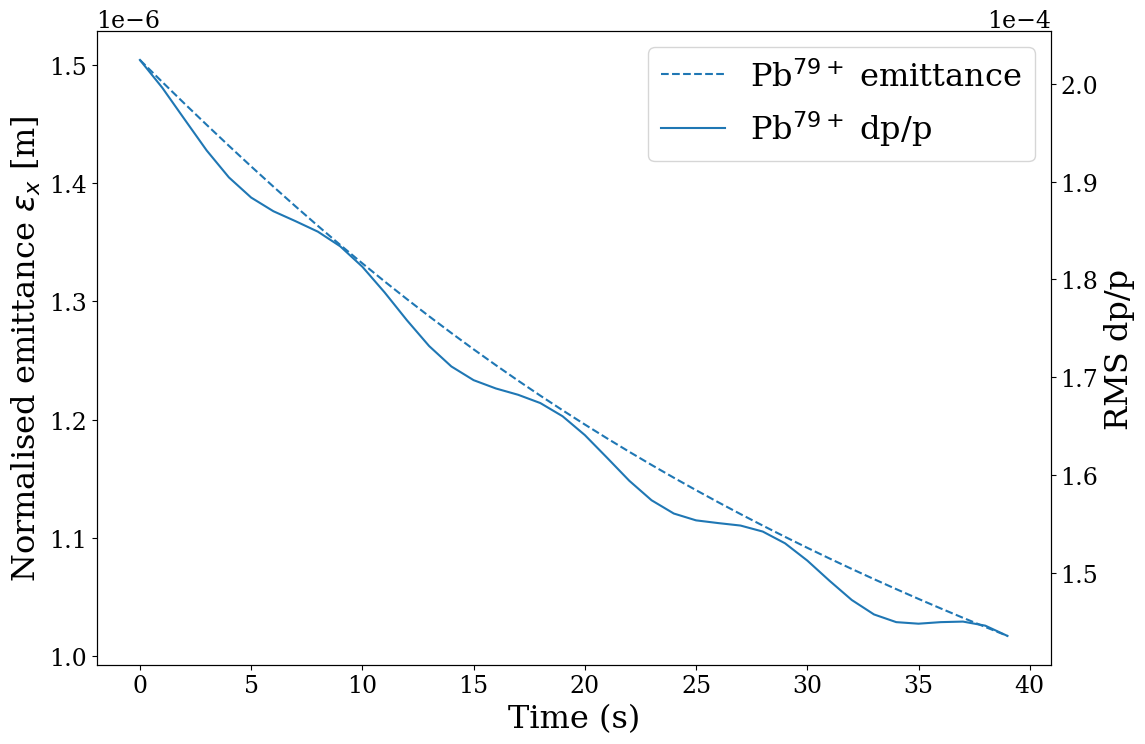

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Create a second y-axis
ax2 = ax1.twinx()

# Lists to store handles and labels
handles = []
labels = []

for ion_loop in [lead]:
    loaded_data = np.load(f'results/transverse/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)
    
    # Plot on ax1 and collect handles and labels
    line1, = ax1.plot(time, emittance_x, linestyle='--', label=f'{ion_loop.name} emittance')
    handles.append(line1)
    labels.append(f'{ion_loop.name} emittance')
    
    # Plot on ax2 and collect handles and labels
    line2, = ax2.plot(time, rms_dp_p, label=f'{ion_loop.name} dp/p')
    handles.append(line2)
    labels.append(f'{ion_loop.name} dp/p')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Normalised emittance $\epsilon_x$ [m]')
ax2.set_ylabel('RMS dp/p')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Combine handles and labels from both axes into a single legend
plt.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.savefig('Laser_cooling_rates.png', dpi=300)
plt.show()


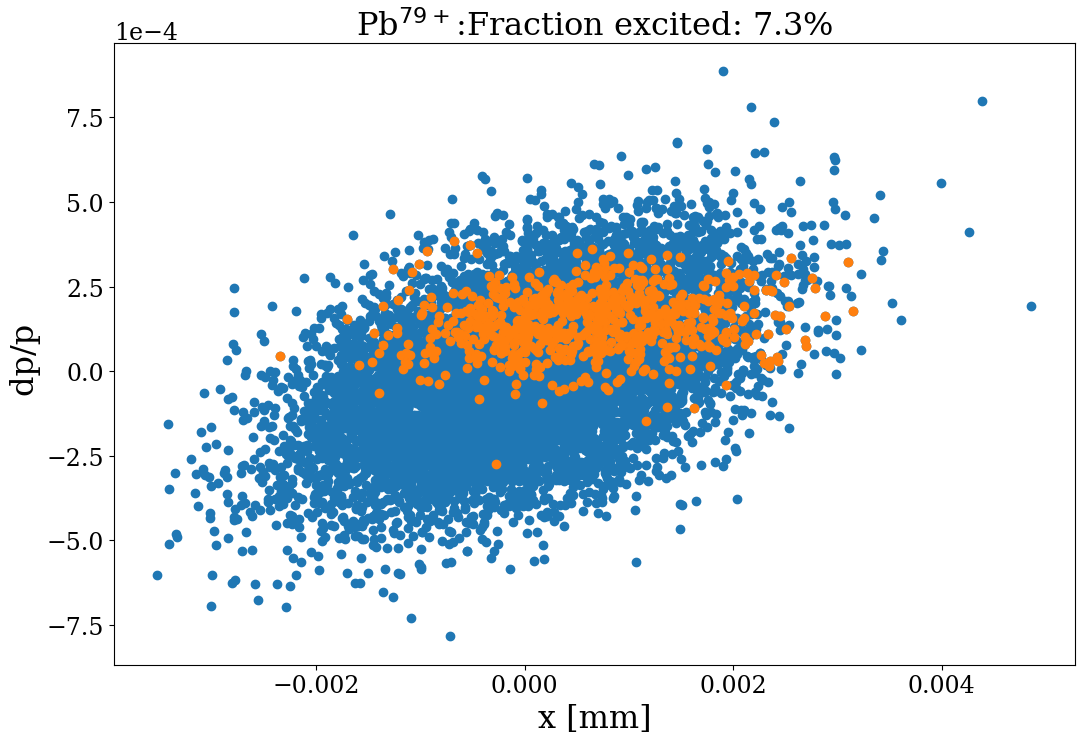

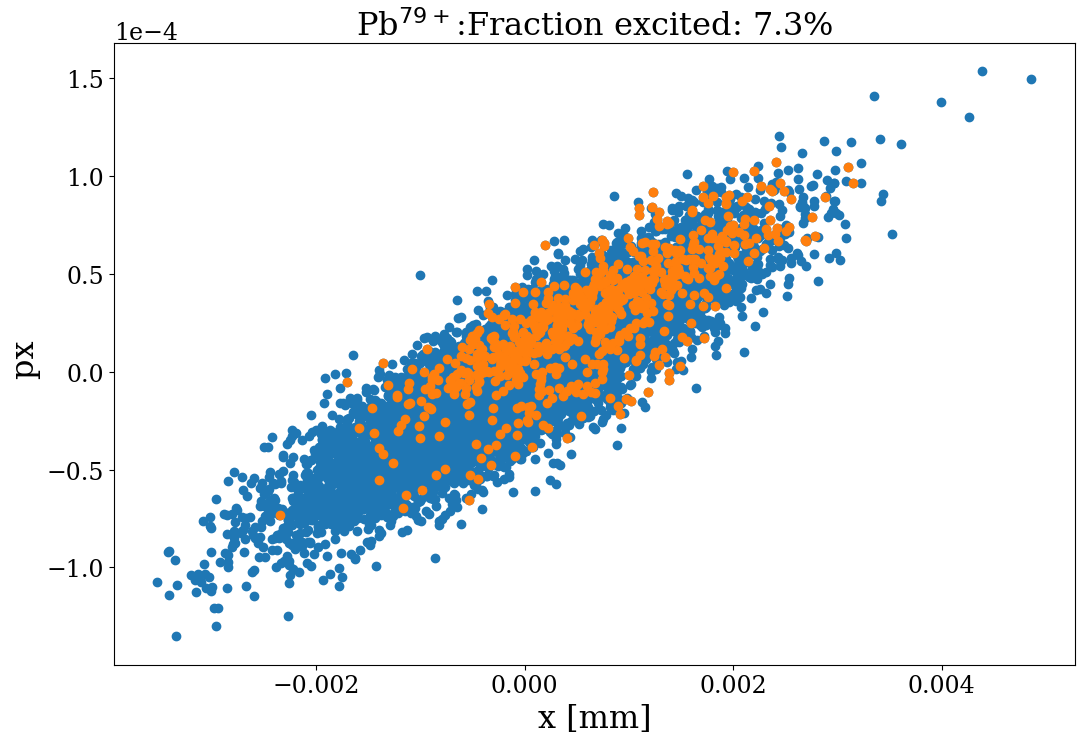

In [22]:
for ion_loop in [lead]:
    loaded_data = np.load(f'results/transverse/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)



    turn=1
    excited=state==2
    excited0=excited[turn,:]
    fraction_excitation0 = sum(excited0)/len(excited0)*100


    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})
    plt.title(f'{ion_loop.name}:Fraction excited: {round(fraction_excitation0, 1)}%')

    #plt.axvline(laser_x,color='red')
    # plt.axvline(laser_x+laser_waist_radius,color='red')
    # plt.axvline(laser_x-laser_waist_radius,color='red')

    plt.scatter(x[turn],delta[turn])
    plt.scatter(x[turn][excited0],delta[turn][excited0])
    plt.xlabel('x [mm]')
    plt.ylabel('dp/p ')
    plt.tight_layout()
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    
    #plt.savefig('First_turn.eps', format='eps', dpi=300)
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})
    plt.title(f'{ion_loop.name}:Fraction excited: {round(fraction_excitation0, 1)}%')

    #plt.axvline(laser_x,color='red')
    # plt.axvline(laser_x+laser_waist_radius,color='red')
    # plt.axvline(laser_x-laser_waist_radius,color='red')

    plt.scatter(x[turn],px[turn])
    plt.scatter(x[turn][excited0],px[turn][excited0])
    plt.xlabel('x [mm]')
    plt.ylabel('px ')
    plt.tight_layout()
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    
    #plt.savefig('First_turn.eps', format='eps', dpi=300)
    plt.show()  

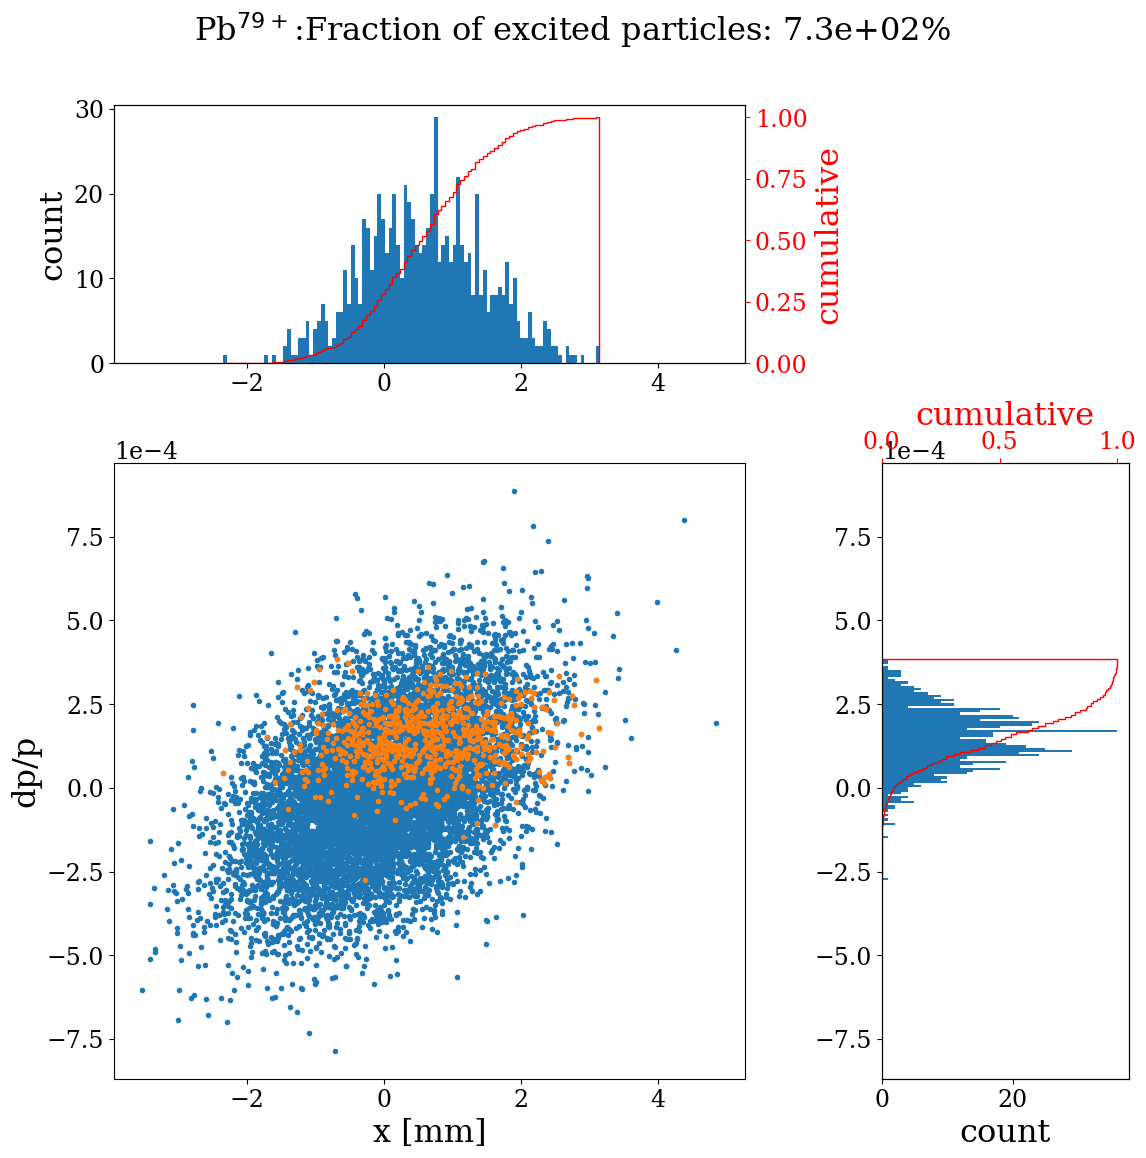

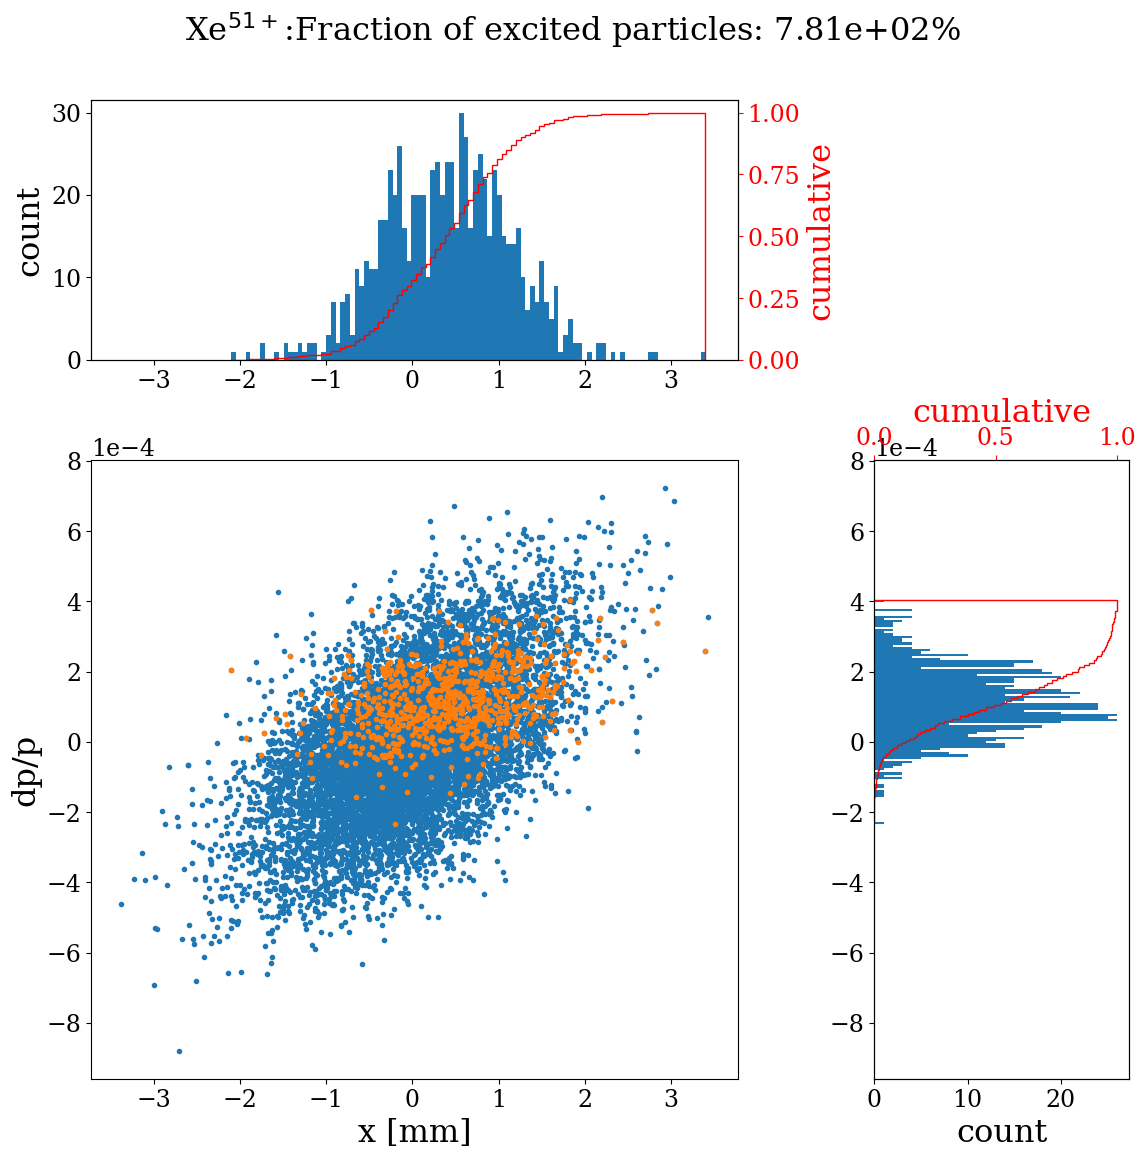

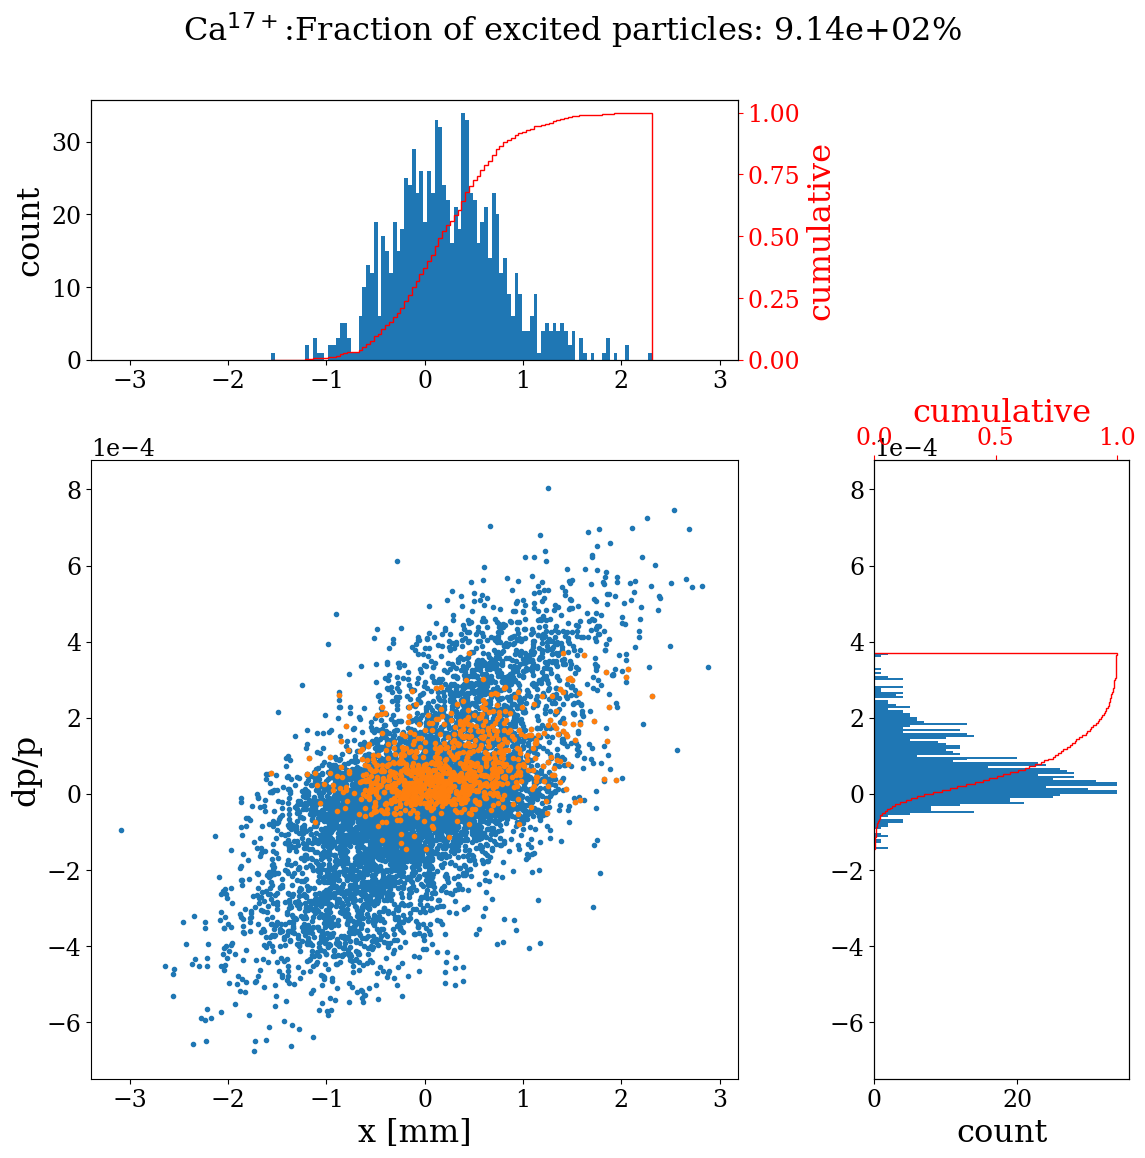

In [23]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

for ion_loop in ions:
    loaded_data = np.load(f'results/transverse/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)

    turn=1
    excited=state==2
    excited0=excited[turn,:]
    fraction_excitation0 = sum(excited0)/len(excited0)*100

    fig = plt.figure(figsize=(12, 12))
    gs = gridspec.GridSpec(3, 3)
    ax_main = plt.subplot(gs[1:3, :2])
    ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
    ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

    ax_main.scatter(x[turn,:]*1e3, delta[turn,:], marker='.')
    ax_main.scatter(x[turn,:][excited0]*1e3, delta[turn,:][excited0], marker='.')
    ax_main.set(xlabel="x [mm]", ylabel="dp/p")

    ax_main.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

    ax_xDist.hist(x[turn,:][excited0]*1e3, bins=100, align='mid')
    ax_xDist.set(ylabel='count')
    ax_xCumDist = ax_xDist.twinx()
    ax_xCumDist.hist(x[turn,:][excited0]*1e3, bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid')
    ax_xCumDist.tick_params('y', colors='r')
    ax_xCumDist.set_ylabel('cumulative', color='r')


    ax_yDist.hist(delta[1,:][excited0], bins=100, orientation='horizontal', align='mid')
    ax_yDist.set(xlabel='count')
    ax_yCumDist = ax_yDist.twiny()
    ax_yCumDist.hist(delta[1,:][excited0], bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid', orientation='horizontal')
    ax_yCumDist.tick_params('x', colors='r')
    ax_yCumDist.set_xlabel('cumulative', color='r')

    # Setting tick label format for y-axis
    ax_xDist.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax_xCumDist.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

    plt.suptitle(f'{ion_loop.name}:Fraction of excited particles: {fraction_excitation0*100:.3}%')

    plt.tight_layout()
    plt.show()


seperate into two plots for the presentation

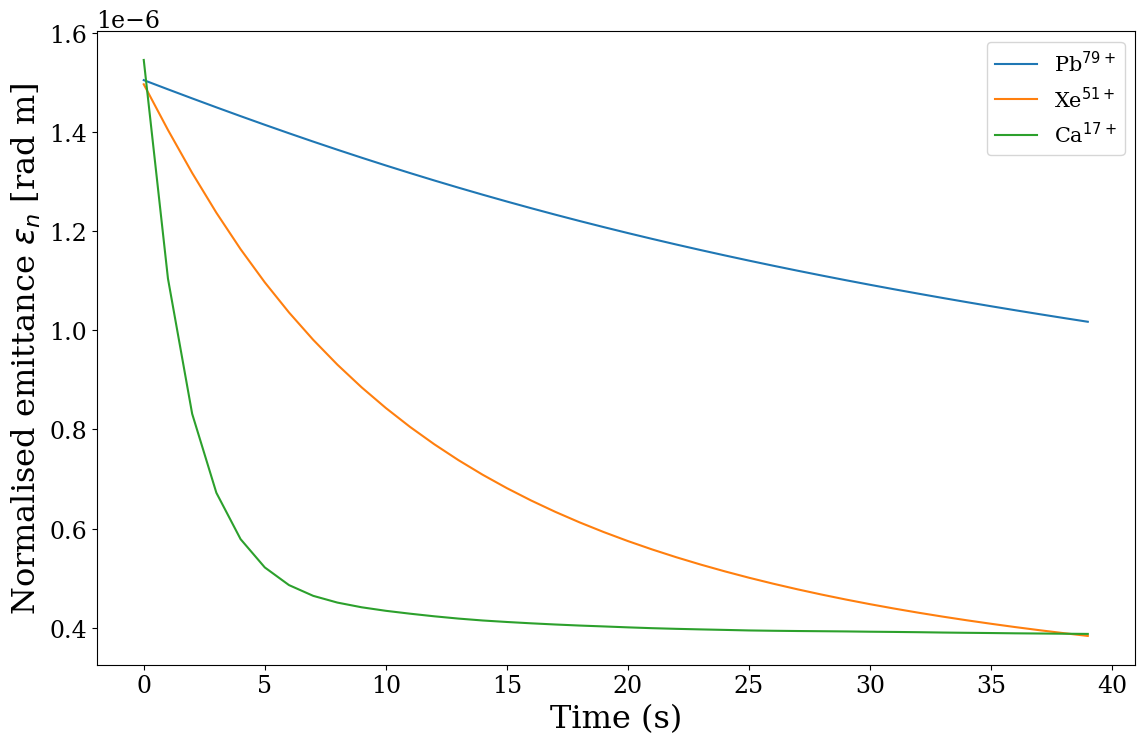

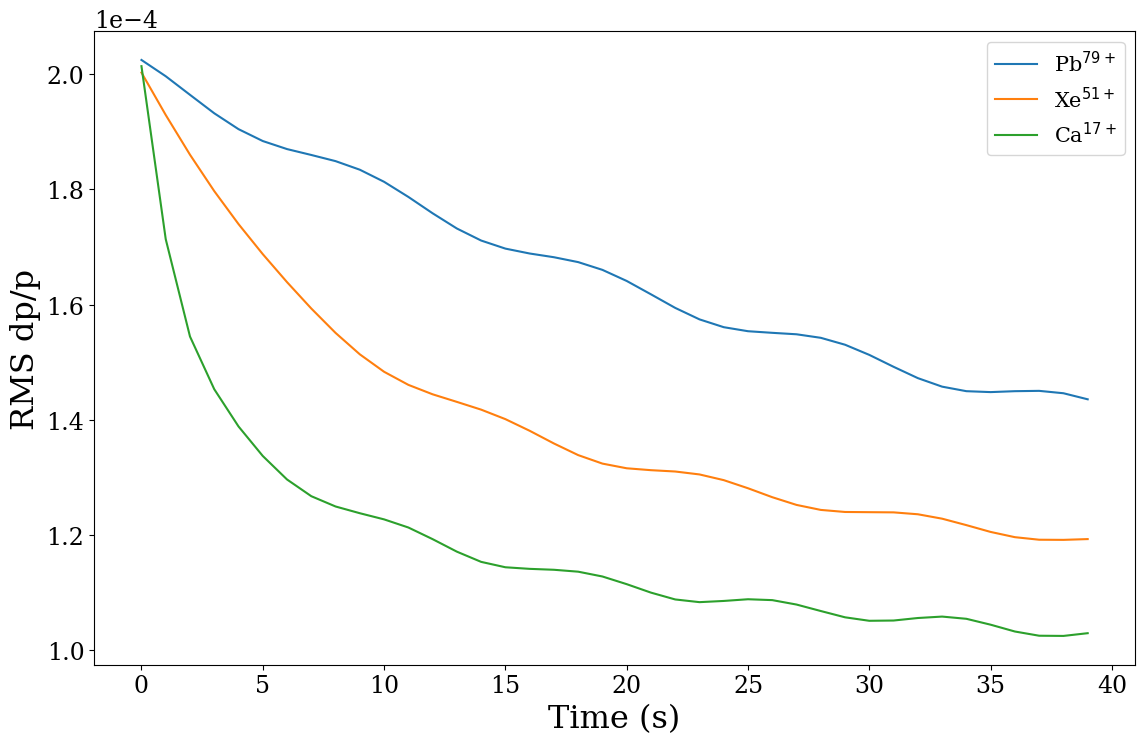

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 25})

# Create the first plot
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Normalised emittance $\epsilon_n$ [rad m]')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Create the second plot
fig2, ax2 = plt.subplots(figsize=(12, 8))
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('RMS dp/p')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

for ion_loop in ions:
    loaded_data = np.load(f'results/transverse/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)
    
    # Plot emittance on the first plot
    ax1.plot(time, emittance_x, label=f'{ion_loop.name}')
    
    # Plot dp/p on the second plot
    ax2.plot(time, rms_dp_p, label=f'{ion_loop.name}')

# Add legends to each plot
ax1.legend(loc='upper right',fontsize=15)
ax2.legend(loc='upper right',fontsize=15)

fig1.tight_layout()
fig2.tight_layout()
# plt.savefig('Laser_cooling_rates.png', dpi=300)
plt.show()


Focus on longitudinal cooling

In [25]:

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 20})


# # Define colors to cycle through
# colors = ['blue', 'green', 'red']

# for i,ion_loop in enumerate(ions):
#     loaded_data = np.load(f'results/longitudinal/{ion_loop.name}.npz')

#     delta = loaded_data['delta']
#     zeta = loaded_data['zeta']
#     state = loaded_data['state']
#     x = loaded_data['x'] 
#     time = loaded_data['time']
#     s_per_turn = loaded_data['s_per_turn']
#     px = loaded_data['px']
#     action_x = loaded_data['action_x']
#     action_y = loaded_data['action_y']
#     emittance_x = loaded_data['emittance_x']
#     rms_dp_p = np.std(delta, axis=1)
    
#     # Plot on ax1 and collect handles and labels
#     #plt.plot(time, rms_dp_p, ls='--',label=f'{ion_loop.name} longitudinal mode',color=colors[i])
#     plt.plot(time, (rms_dp_p), label=f'{ion_loop.name}',color=colors[i])

#     loaded_data = np.load(f'results/{ion_loop.name}.npz')

#     delta = loaded_data['delta']
#     zeta = loaded_data['zeta']
#     state = loaded_data['state']
#     x = loaded_data['x']
#     time=loaded_data['time']
#     s_per_turn=loaded_data['s_per_turn']
#     px=loaded_data['px']
#     action_x=loaded_data['action_x']
#     action_y=loaded_data['action_y']
#     emittance_x=loaded_data['emittance_x']
#     rms_dp_p = np.std(delta, axis=1)
    
#     # plt.plot(time, rms_dp_p, label=f'{ion_loop.name} transverse mode',color=colors[i])

# plt.xlabel(r'Time [s]')
# plt.ylabel(r'RMS dp/p')
# plt.legend()
# plt.tight_layout()
# plt.savefig('Transverse_laser_cooling_rates.png', dpi=300)
# # plt.xlim([0,10])
# plt.show()




optimal laser position

min_laser_offset: -1.2416107382550332
min_laser_offset: -1.3758389261744963
min_laser_offset: -1.577181208053691


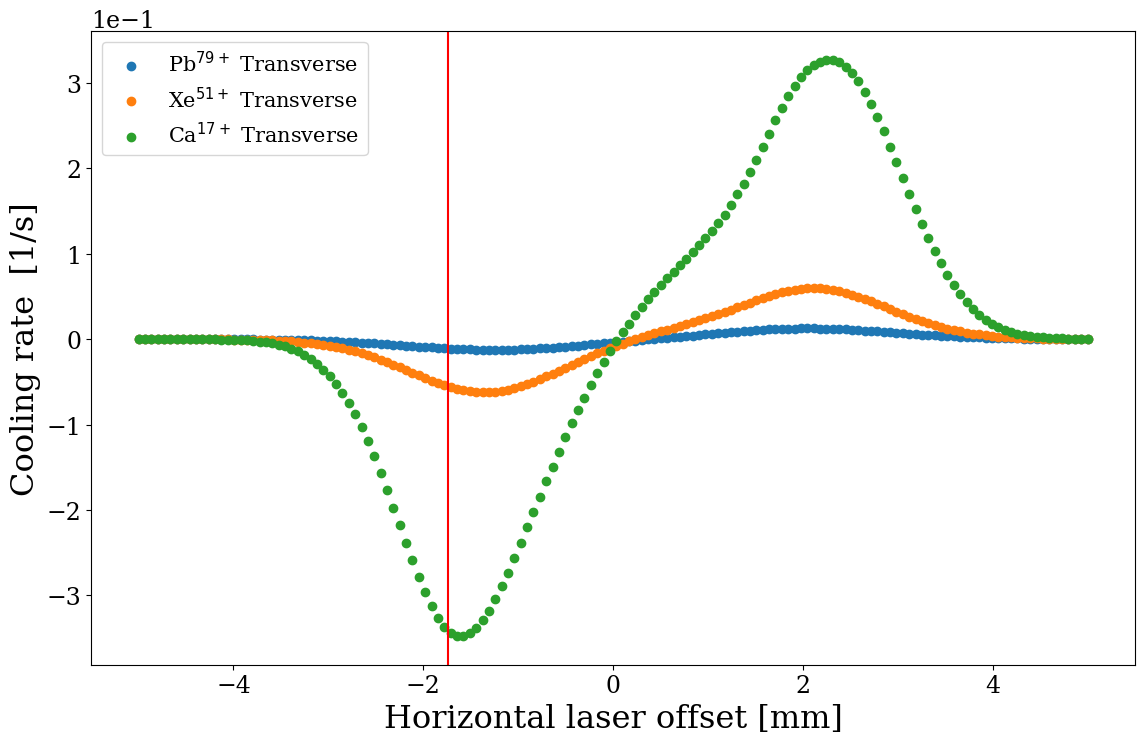

In [26]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

for ion_loop in ions:# Ion properties:       
    data = np.load(f'results/optimal_laser_x/{ion_loop.name}.npz')  # Replace 'ion_name' with the appropriate value

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)
    
    
    plt.scatter(laser_x_list*1e3,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse')    
plt.xlabel('Horizontal laser offset [mm]')
plt.ylabel('Cooling rate  [1/s]')
ax = plt.gca()
# Removing the offset from the y-axis tick labels
ax.yaxis.get_major_formatter().set_useOffset(False)
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.axvline(-1.7346938775510203,color='red')
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

final emittance

min_laser_offset: -1.2416107382550332


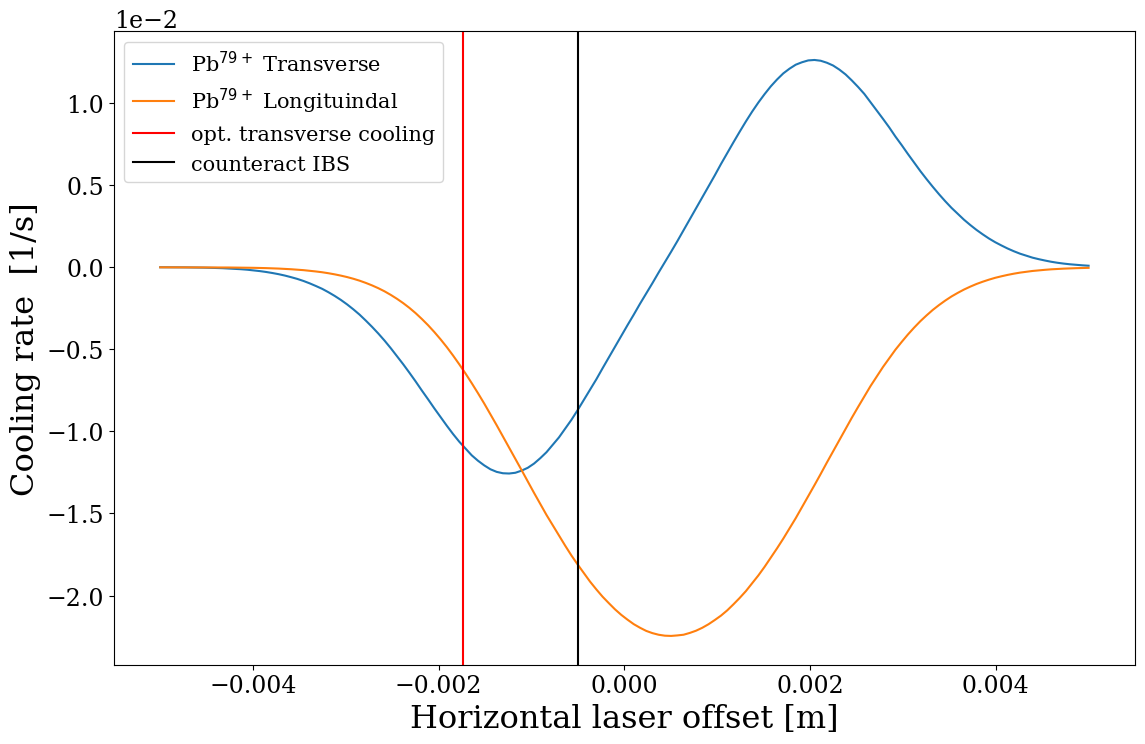

In [27]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ion_loop in [lead]:# Ion properties:       
    data = np.load(f'results/optimal_laser_x/{ion_loop.name}.npz')  # Replace 'ion_name' with the appropriate value

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)    
    
    plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse')
    plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal')
    
    plt.xlabel('Horizontal laser offset [m]')
    plt.ylabel('Cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.axvline(-1.7346938775510203*1e-3,color='red',label='opt. transverse cooling')
    plt.axvline(-0.5033557046979862*1e-3,color='black',label='counteract IBS')
    plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

In [28]:
loaded_data = np.load('results/transverse/Xe$^{51+}$.npz')

delta    = loaded_data['delta']
zeta    = loaded_data['zeta']
state = loaded_data['state']
x = loaded_data['x']
time=loaded_data['time']
s_per_turn=loaded_data['s_per_turn']
px=loaded_data['px']
action_x=loaded_data['action_x']
action_y=loaded_data['action_y']
emittance_x=loaded_data['emittance_x']

excited=state==2
delta_std = np.std(delta, axis=1)

exc0=excited[1,:]

fraction_excited=sum(exc0)/len(exc0)*100

fraction_excited=[]
for i in range(len(excited)):
    fraction_excited.append(100*sum(excited[i])/len(excited[i]))


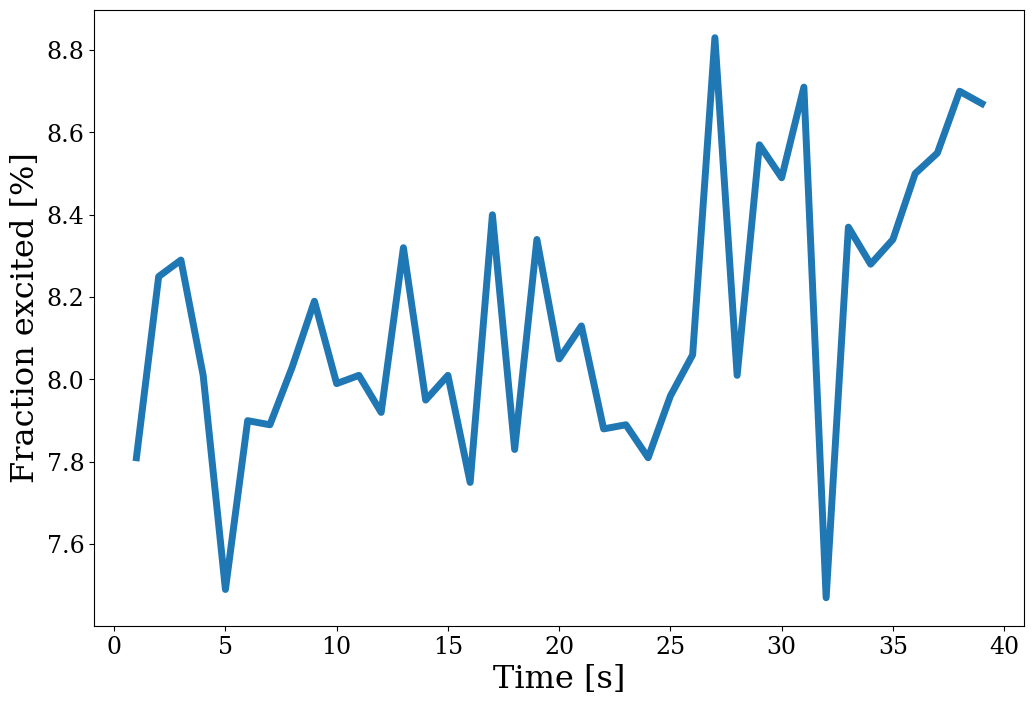

In [29]:
cmap = plt.get_cmap("tab10")
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(time[1:],fraction_excited[1:], label=f'xsuite',color=cmap(0), linewidth=5.0)
plt.xlabel(r'Time [s]')
plt.ylabel(r'Fraction excited [%]')
#plt.legend()
plt.show()

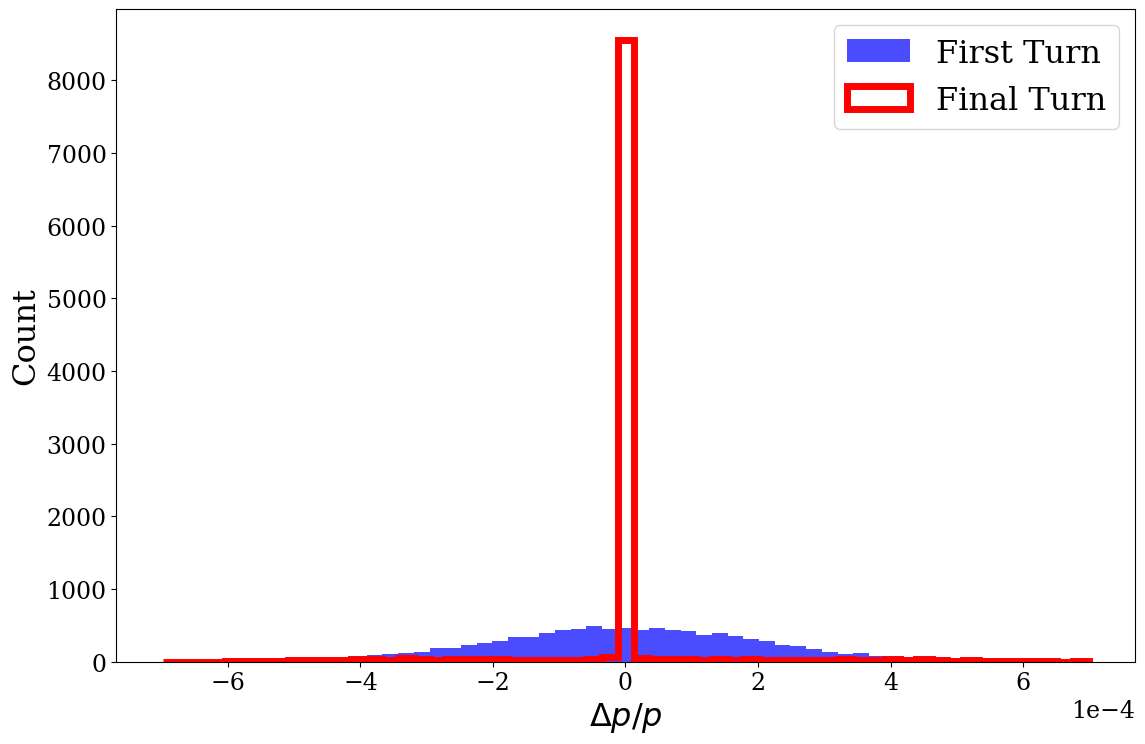

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Extract delta at the first turn (assuming the first turn is at index 0)
delta_first_turn = delta[0, :]

# Extract delta at the final turn
delta_final_turn = delta[-1, :]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Plot histograms for delta at the first and final turns
min_delta=min(delta_final_turn)
max_delta=max(delta_final_turn)
bins=np.linspace(min_delta, max_delta,60)
# plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn')
# plt.hist(delta_final_turn, bins=bins, color='darkorange', alpha=0.0, label='Final Turn')
plt.hist(delta_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn',  linewidth=5)
plt.hist(delta_final_turn, bins=bins, color='red', alpha=1, label='Final Turn', histtype='step', linewidth=5)
plt.xlabel(r'$\Delta p/p$')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.savefig('Histogram_comparison.eps', format='eps', dpi=300)
plt.show()


PX

In [31]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Extract delta at the first turn (assuming the first turn is at index 0)
# px_first_turn = px[0, :]

# # Extract px at the final turn
# px_final_turn = px[-1, :]

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})

# # Plot histograms for px at the first and final turns
# min_px=min(px_final_turn)
# max_px=max(px_final_turn)
# bins=np.linspace(min_delta, max_px,60)
# # plt.hist(px_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn')
# # plt.hist(px_final_turn, bins=bins, color='darkorange', alpha=0.0, label='Final Turn')
# plt.hist(px_first_turn, bins=bins, color='blue', alpha=0.7, label='First Turn',  linewidth=5)
# plt.hist(px_final_turn, bins=bins, color='red', alpha=1, label='Final Turn', histtype='step', linewidth=5)
# plt.xlabel('px')
# plt.ylabel('Count')
# plt.legend()
# plt.tight_layout()
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# #plt.savefig('Histogram_comparison.eps', format='eps', dpi=300)
# plt.show()


phase space

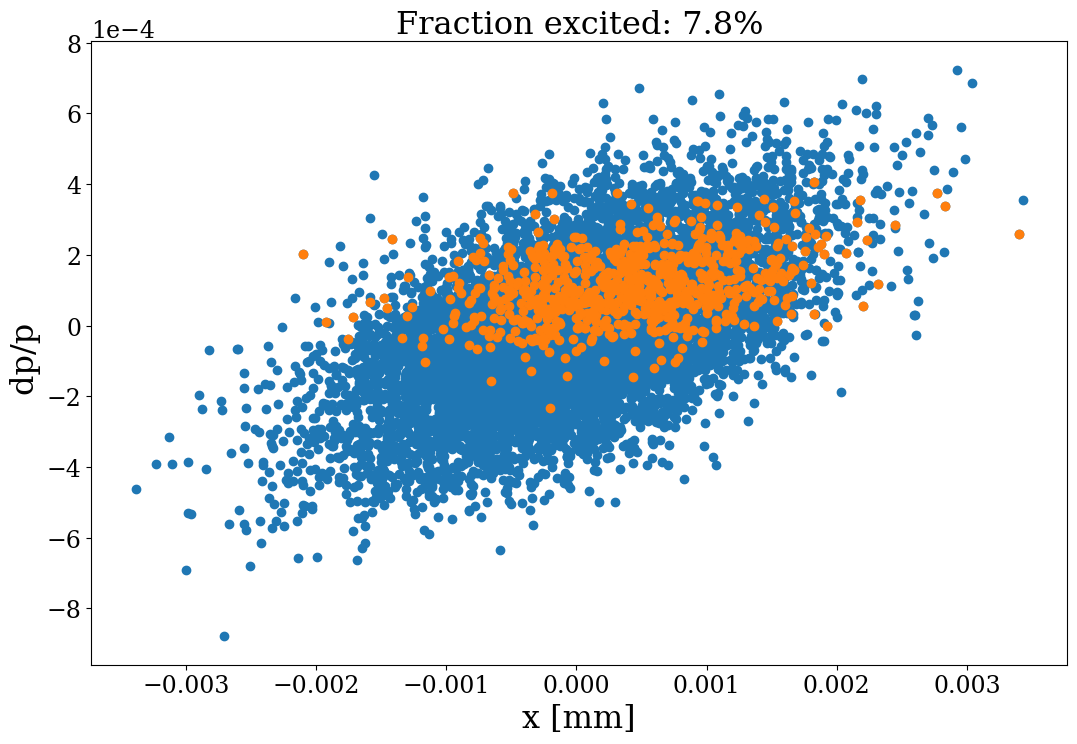

In [32]:
turn=1
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],delta[turn])
plt.scatter(x[turn][excited0],delta[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
#plt.savefig('First_turn.eps', format='eps', dpi=300)
plt.show()

with histogram

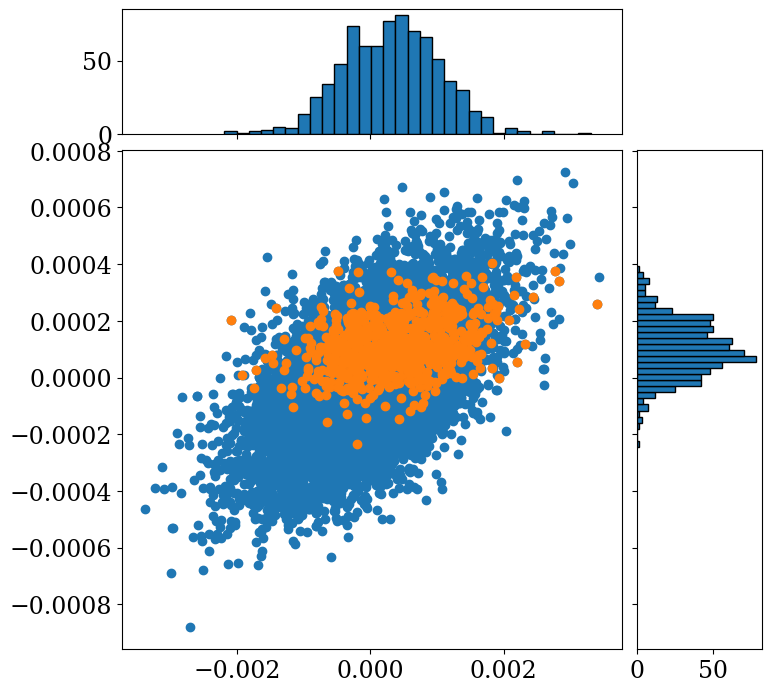

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate histograms for excited particles
x_excited_hist, x_excited_bins = np.histogram(x[turn][excited0], bins=30)
delta_excited_hist, delta_excited_bins = np.histogram(delta[turn][excited0], bins=30)

# Start with a square Figure.
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Create the main Axes.
ax_main = fig.add_subplot(gs[1, 0])

# Create the histogram along x-axis for excited particles.
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax_main)

# Create the histogram along y-axis for excited particles.
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax_main)

# Plot the scatter plot on the main Axes.
ax_main.scatter(x[turn], delta[turn])
ax_main.scatter(x[turn][excited0], delta[turn][excited0])

# Plot the histogram along x-axis for excited particles.
ax_histx.bar(x_excited_bins[:-1], x_excited_hist, width=np.diff(x_excited_bins), edgecolor='black')

# Plot the histogram along y-axis for excited particles.
ax_histy.barh(delta_excited_bins[:-1], delta_excited_hist, height=np.diff(delta_excited_bins), edgecolor='black')

# Remove inner labels for histogram plots
ax_histx.tick_params(axis='x', which='both', labelbottom=False)
ax_histy.tick_params(axis='y', which='both', labelleft=False)

plt.show()


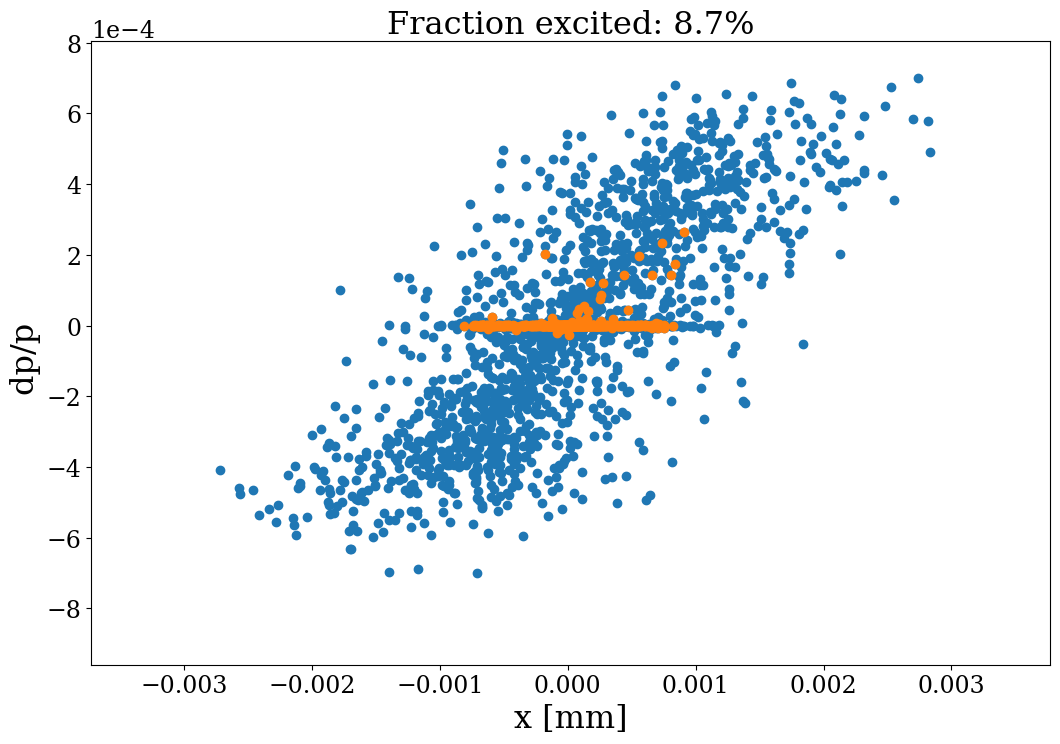

In [34]:
turn=-1
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],delta[turn])
plt.scatter(x[turn][excited0],delta[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()

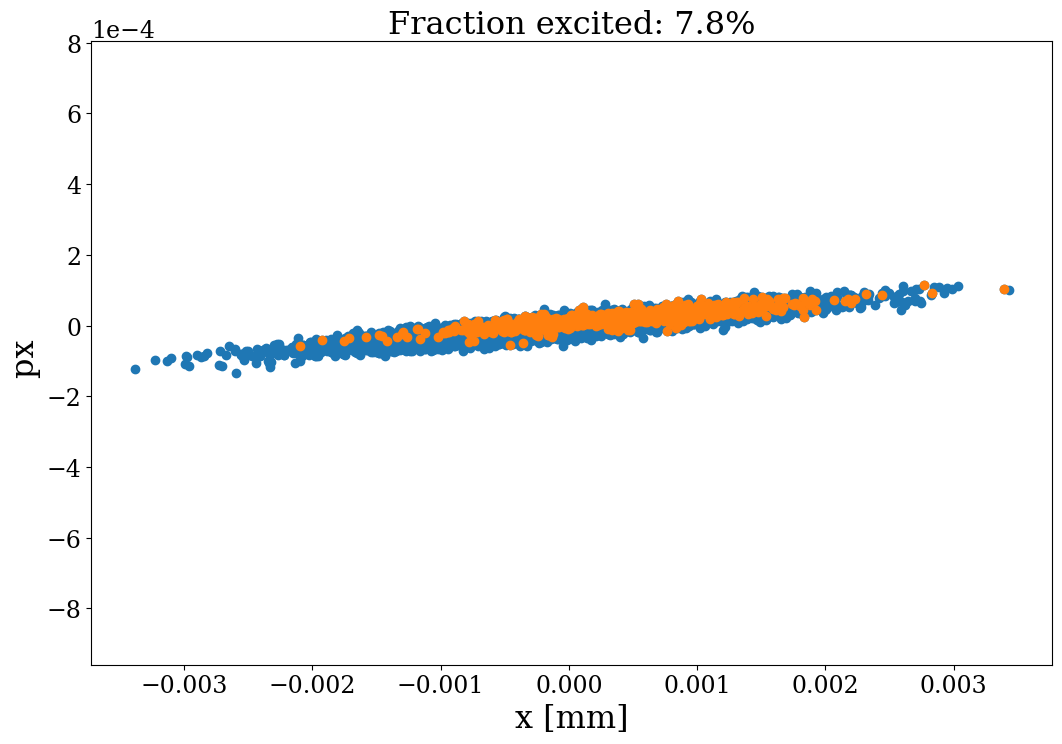

In [35]:
turn=1
excited0=excited[turn,:]
fraction_excitation0 = sum(excited0)/len(excited0)*100


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

#plt.axvline(laser_x,color='red')
# plt.axvline(laser_x+laser_waist_radius,color='red')
# plt.axvline(laser_x-laser_waist_radius,color='red')

plt.scatter(x[turn],px[turn])
plt.scatter(x[turn][excited0],px[turn][excited0])
plt.xlabel('x [mm]')
plt.ylabel('px ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()

Zeta

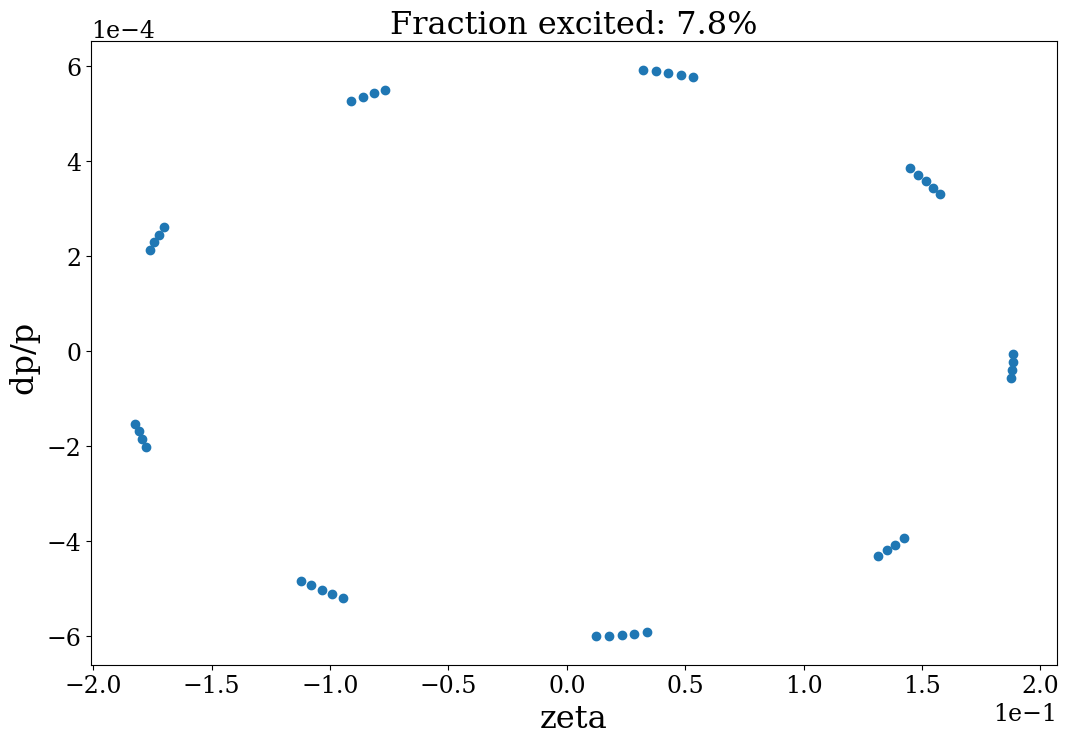

In [36]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.title(f'Fraction excited: {round(fraction_excitation0, 1)}%')

plt.scatter(zeta[:,0],delta[:,0]) #turns,particles
plt.xlabel('zeta')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()

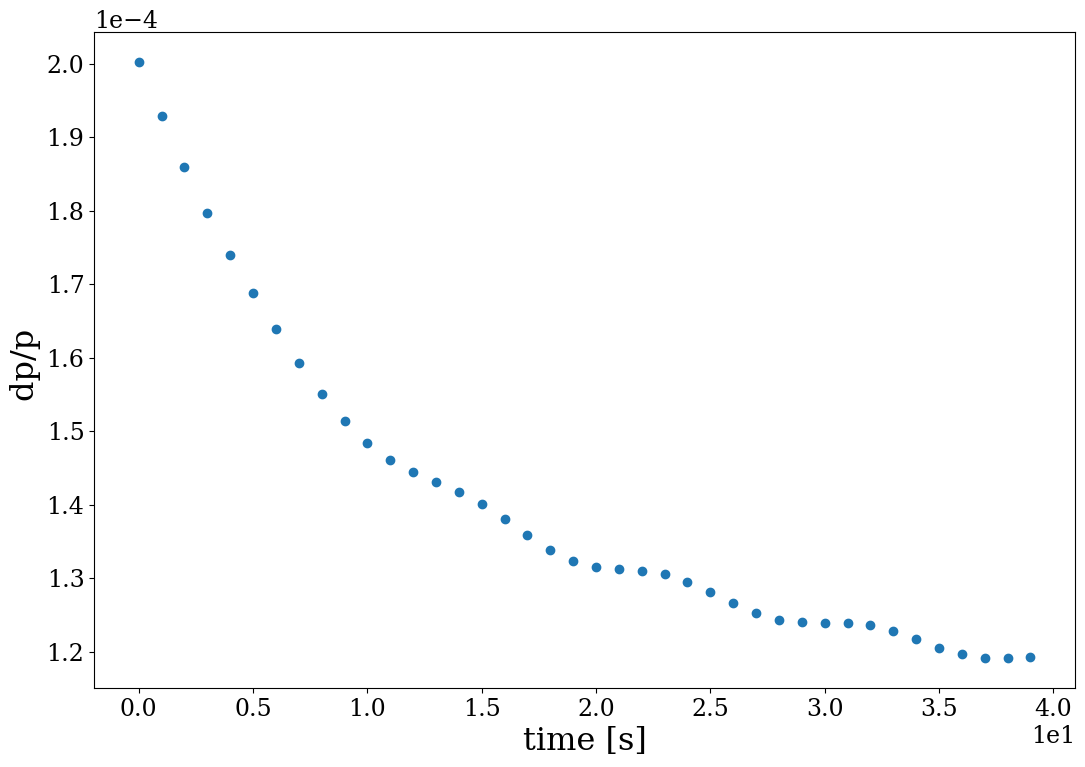

In [37]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.scatter(time,np.std(delta,axis=1)) #turns,particles
plt.xlabel('time [s]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()